In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
notes_dataset = pd.read_csv('fraud_detection_bank_dataset.csv')

In [7]:
# null values 
notes_dataset.isnull().sum()

Unnamed: 0    0
col_0         0
col_1         0
col_2         0
col_3         0
             ..
col_108       0
col_109       0
col_110       0
col_111       0
targets       0
Length: 114, dtype: int64

In [8]:
notes_dataset = notes_dataset.dropna()

In [9]:
notes_dataset.shape

(20468, 114)

In [10]:
notes_dataset.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


# Data set Descriptive statitics

In [ ]:
!pip install datatile

In [71]:
from datatile.summary.df import DataFrameSummary

notes_des = DataFrameSummary(notes_dataset)

In [72]:
notes_des.columns_stats.T

,counts,uniques,missing,missing_perc,types
Unnamed: 0,20468,20468,0,0%,numeric
col_0,20468,142,0,0%,numeric
col_1,20468,1920,0,0%,numeric
col_2,20468,53,0,0%,numeric
col_3,20468,115,0,0%,numeric
...,...,...,...,...,...
col_108,20468,2,0,0%,bool
col_109,20468,2,0,0%,bool
col_110,20468,13,0,0%,numeric
col_111,20468,381,0,0%,numeric


In [73]:
notes_dataset.columns

Index(['Unnamed: 0', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=114)

In [74]:
notes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20468.0,10233.500000,5908.746991,0.0,5116.75,10233.5,15350.25,20467.0
col_0,20468.0,3.226256,20.564308,0.0,0.00,0.0,2.00,2301.0
col_1,20468.0,294.793043,717.541984,0.0,38.00,97.0,283.00,37808.0
col_2,20468.0,0.420021,7.367275,0.0,0.00,0.0,0.00,904.0
col_3,20468.0,2.329343,10.068512,0.0,0.00,1.0,2.00,772.0
...,...,...,...,...,...,...,...,...
col_108,20468.0,0.000049,0.006990,0.0,0.00,0.0,0.00,1.0
col_109,20468.0,0.049345,0.216593,0.0,0.00,0.0,0.00,1.0
col_110,20468.0,0.024282,0.305079,0.0,0.00,0.0,0.00,17.0
col_111,20468.0,43.486125,59.217560,0.0,5.00,19.0,61.25,747.0


In [75]:
notes_dataset.dtypes

Unnamed: 0    int64
col_0         int64
col_1         int64
col_2         int64
col_3         int64
              ...  
col_108       int64
col_109       int64
col_110       int64
col_111       int64
targets       int64
Length: 114, dtype: object

#  Visualizations

Text(0.5, 1.0, 'plotting 20 largest parameters of column 1')

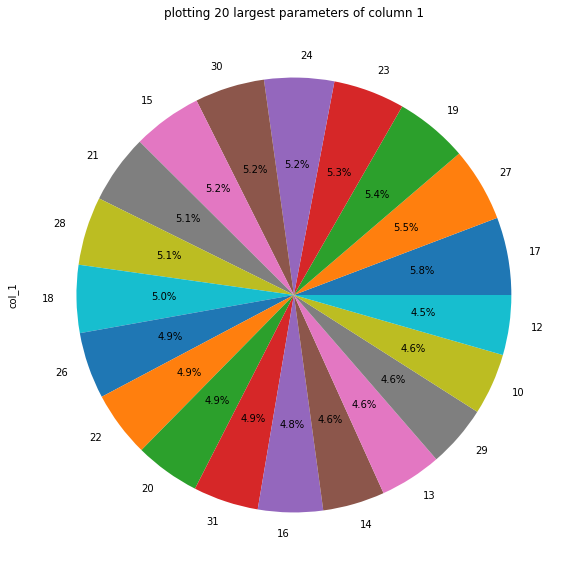

In [116]:
# plotting 20 largest parameters of column 1

notes_dataset['col_1'].value_counts().nlargest(20).plot(kind='pie', autopct='%1.1f%%', figsize = (10,10))

plt.title('plotting 20 largest parameters of column 1')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Targets classification')

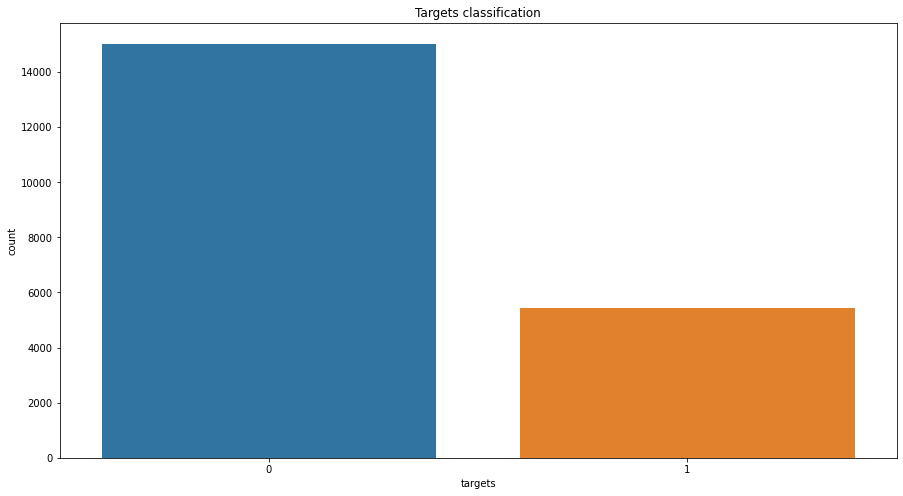

In [83]:
# target samples
plt.figure(figsize=(15,8))
sns.countplot(notes_dataset['targets'])
plt.title('Targets classification')

# word cloud to get the maximum frequency

Text(0.5, 1.0, 'column 1 data presentation')

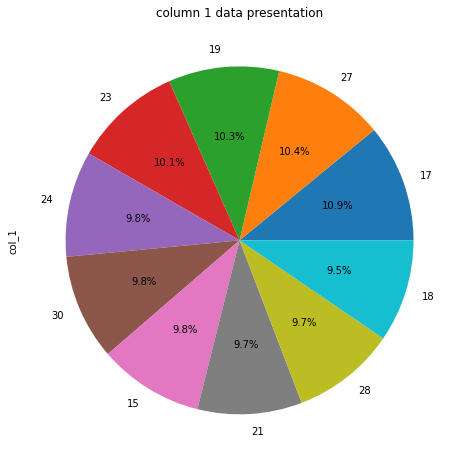

In [85]:
# top 15 longest duration movies
notes_dataset['col_1'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%', figsize = (20,8))
plt.title('column 1 data presentation')

# Data Preprocessing

In [87]:
#drop the targets column from the data
x = notes_dataset.drop(columns = ['targets'])
y = notes_dataset['targets']

# Data splitting 

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [89]:
x_train.shape

(14327, 113)

In [90]:
x_test.shape

(6141, 113)

# Data Standardization

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
#standardize the data
standard = StandardScaler()
xs_train = standard.fit_transform(x_train)
xs_test = standard.fit_transform(x_test)

# PCA

In [94]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA(n_components=2)
X = pca.fit_transform(xs_train)

In [132]:
X

array([[-1.37530415, -2.82458766],
       [-1.57919552,  1.59738889],
       [-1.52858159,  0.90730686],
       ...,
       [-1.66372179, -1.45590378],
       [-1.38923039,  1.48708642],
       [-1.57631111,  1.67238174]])

In [133]:
Df = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])

In [134]:
Df

,principal component 1,principal component 2
0,-1.375304,-2.824588
1,-1.579196,1.597389
2,-1.528582,0.907307
3,-1.163928,1.467718
4,-1.157154,1.590172
...,...,...
14322,-0.404935,0.623291
14323,2.206270,-2.020768
14324,-1.663722,-1.455904
14325,-1.389230,1.487086


In [135]:
Df['target'] = y

In [136]:
Df['target'].unique()

array([1, 0])

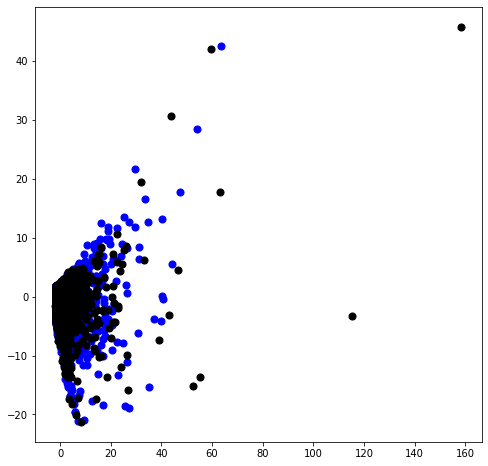

In [137]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
trgt = [0, 1]
colors = ['b', 'black']
for i,j in zip(trgt, colors):
  index = Df['target'] == i
  ax.scatter(Df.loc[index, 'principal component 1']
               , Df.loc[index, 'principal component 2']
               , c = j, s=50)

# Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

In [104]:
RF_model.fit(xs_train, y_train)
RF_pred = RF_model.predict(xs_test)

# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

In [107]:
DT_model.fit(xs_train, y_train)
DT_pred = DT_model.predict(xs_test)

# SVC Model

In [108]:
from sklearn import svm
svm_model = svm.SVC()

In [109]:
svm_model.fit(xs_train, y_train)
svm_pred = svm_model.predict(xs_test)

# Model's Results

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [111]:
# Random Forest Classifier
print('Accuracy value', accuracy_score(RF_pred, y_test)  )
print('confusion_matrix \n', confusion_matrix(RF_pred, y_test))
print('\n classification_report \n', classification_report(RF_pred, y_test))

Accuracy value 0.9959290017912392
confusion_matrix 
 [[4471   25]
 [   0 1645]]

 classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4496
           1       0.99      1.00      0.99      1645

    accuracy                           1.00      6141
   macro avg       0.99      1.00      0.99      6141
weighted avg       1.00      1.00      1.00      6141



In [113]:
# Decision Tree Classifier
print('Accuracy value', accuracy_score(DT_pred, y_test)  )
print('confusion_matrix \n', confusion_matrix(DT_pred, y_test))
print('\n classification_report \n', classification_report(DT_pred, y_test))

Accuracy value 0.9959290017912392
confusion_matrix 
 [[4471   25]
 [   0 1645]]

 classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4496
           1       0.99      1.00      0.99      1645

    accuracy                           1.00      6141
   macro avg       0.99      1.00      0.99      6141
weighted avg       1.00      1.00      1.00      6141



In [114]:
print('Accuracy value', accuracy_score(svm_pred, y_test)  )
print('confusion_matrix \n', confusion_matrix(svm_pred, y_test))
print('\n classification_report \n', classification_report(svm_pred, y_test))

Accuracy value 0.9804592085979482
confusion_matrix 
 [[4448   97]
 [  23 1573]]

 classification_report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4545
           1       0.94      0.99      0.96      1596

    accuracy                           0.98      6141
   macro avg       0.97      0.98      0.97      6141
weighted avg       0.98      0.98      0.98      6141

